# AIエンジニアを目指す人のための機械学習入門

## 第３章：実装しながら学ぶアルゴリズムのこころ・教師なし学習編

### <u>主成分分析による次元圧縮</u>

/var/folders/zf/hrrblb9s6xq9jm4k7ttzmbvc0000gn/T/ipykernel_95837/1101759953.py:12: RuntimeWarning: covariance is not positive-semidefinite.
  X = np.random.multivariate_normal(mean, cov, 300)


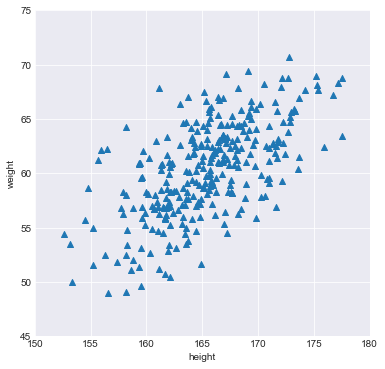

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")


np.random.seed(0)

# データ準備
# ２次元データの正規分布で模擬データ３００人分を作成
mean = [165, 60]
cov = [[15, 20], [20, 10]]
X = np.random.multivariate_normal(mean, cov, 300)

plt.figure(figsize=(6, 6))
plt.scatter(X.T[0], X.T[1], marker="^")
plt.xlim(150, 180)
plt.ylim(45, 75)
plt.xlabel("height")
plt.ylabel("weight")
plt.show()

In [2]:
from sklearn import preprocessing, decomposition


sc = preprocessing.StandardScaler()
sc.fit(X)
X_std = sc.transform(X)

# 主成分分析
pca = decomposition.PCA(random_state=0)
pca.fit(X_std)
X_pca = pca.transform(X_std)


print("主成分の分散説明率")
print(pca.explained_variance_ratio_)

print("固有ベクトル")
print(pca.components_)

主成分の分散説明率
[0.81346872 0.18653128]
固有ベクトル
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


第１主成分の固有ベクトルの軸をプロットする

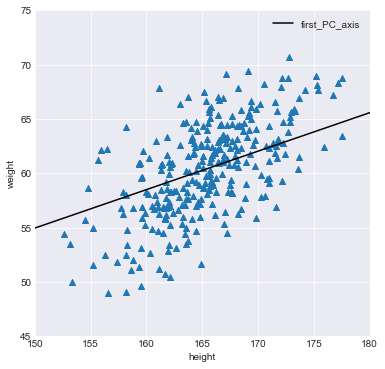

In [3]:
# 第１主成分の軸を描画するために軸状の２点が欲しい
# 平均値に、正規化操作分を戻した固有ベクトルを足す（または引く）
pca_point1 = sc.mean_ - sc.inverse_transform(pca.components_)[0]
pca_point2 = sc.mean_ + sc.inverse_transform(pca.components_)[0]
pca_point = np.c_[pca_point1, pca_point2] # 点を列方向に足す


# データを描画
plt.figure(figsize=(6, 6))
plt.scatter(X.T[0], X.T[1], marker="^")
plt.plot(pca_point[0], pca_point[1], color="black", label="first_PC_axis")
plt.xlim(150, 180)
plt.ylim(45, 75)
plt.xlabel("height")
plt.ylabel("weight")
plt.legend()
plt.show()

In [4]:
# 任意のデータをPCA（主成分分析する）
data = (160, 50)
data_std = sc.transform([data])
data_pca = pca.transform(data_std)
print(data_pca)

[[ 2.48793062 -0.88428776]]


### <u>k-meansによるクラスタリングとデータ前処理</u>

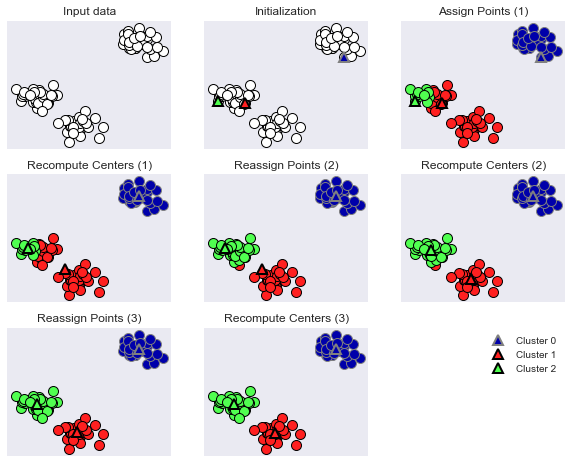

In [5]:
import mglearn
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")

mglearn.plots.plot_kmeans_algorithm()

In [6]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1500, n_features=2, centers=2, random_state=2)
print(X.shape)
print(y.shape)

# X[:, 0] = X[:, 0]*10

(1500, 2)
(1500,)


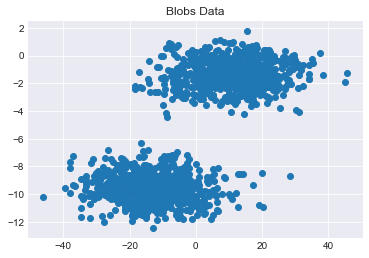

In [7]:
X[:, 0] = X[:, 0]*10

plt.scatter(X[:, 0], X[: ,1])
plt.title("Blobs Data")
plt.show()

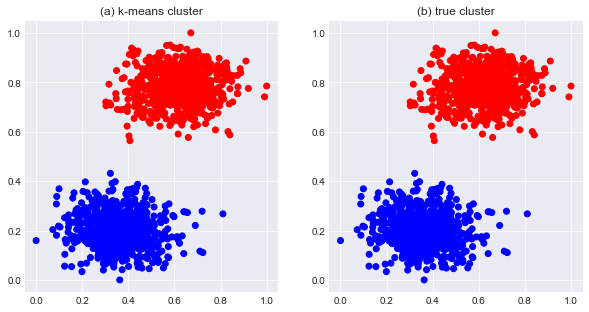

In [8]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


# データの正規化
X_norm = MinMaxScaler().fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=0)
y_pred = kmeans.fit_predict(X_norm)


plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=~y_pred, cmap="bwr")
plt.title("(a) k-means cluster")
plt.subplot(122)
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y, cmap="bwr")
plt.title("(b) true cluster")
plt.show()

正規化した場合はクラスタリングがうまくいく

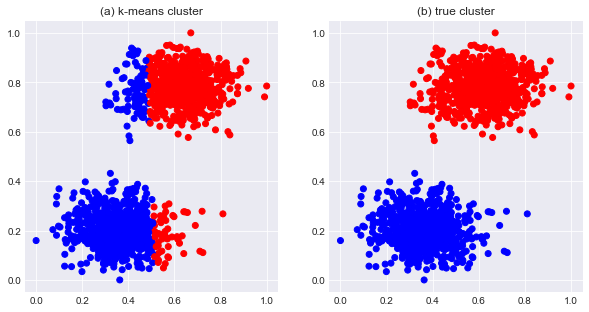

In [9]:
kmeans = KMeans(n_clusters=2, random_state=0)
y_pred = kmeans.fit_predict(X)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=~y_pred, cmap="bwr")
plt.title("(a) k-means cluster")
plt.subplot(122)
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y, cmap="bwr")
plt.title("(b) true cluster")
plt.show()

正規化なしの場合はうまくクラスタリングできていない

### <u>ガウス混合モデル（GMM）によるクラスタリング</u>

(1500, 2)
(1500,)


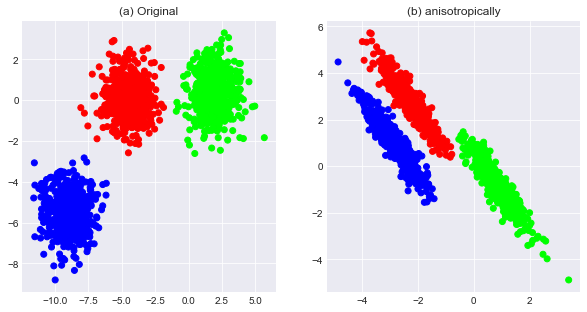

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
plt.style.use("seaborn-darkgrid")

# データの準備
X, y = make_blobs(n_samples=1500, centers=3, random_state=170)
print(X.shape)
print(y.shape)

transformation = [[0.5, -0.6], [-0.3, 0.8]]
X_aniso = np.dot(X, transformation)

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title("(a) Original")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="brg")
plt.subplot(122)
plt.title("(b) anisotropically")
plt.scatter(X_aniso[:, 0], X_aniso[: ,1], c=y, cmap="brg")
plt.show()

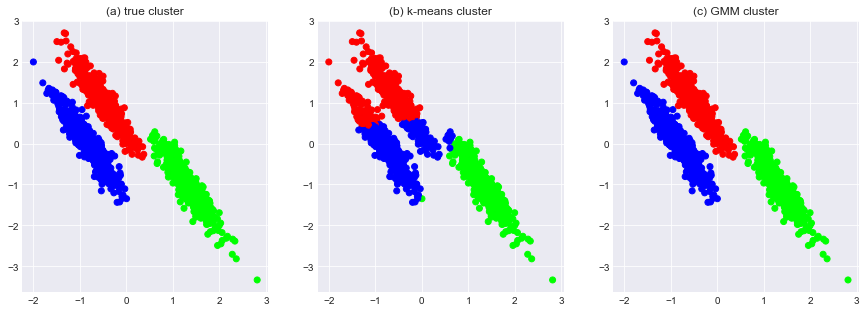

In [12]:
# ガウス混合モデルの適用
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

X_norm = StandardScaler().fit_transform(X_aniso)

# k-means
kmeans = KMeans(n_clusters=3, random_state=5)
kmeans.fit(X_norm)
kmeans_y_pred = kmeans.predict(X_norm)

# ガウス混合モデル
gmm = GaussianMixture(n_components=3, random_state=5)
gmm.fit(X_norm)
gmm_y_pred = gmm.predict(X_norm)

# クラスタリング結果の可視化
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.title("(a) true cluster")
plt.scatter(X_norm[: ,0], X_norm[: ,1], c=y, cmap="brg")
plt.subplot(132)
plt.title("(b) k-means cluster")
plt.scatter(X_norm[: ,0], X_norm[: ,1], c=kmeans_y_pred, cmap="brg")
plt.subplot(133)
plt.title("(c) GMM cluster")
plt.scatter(X_norm[: ,0], X_norm[: ,1], c=gmm_y_pred, cmap="brg")
plt.show()

In [26]:
new_data = [[-0.5, 0.3]]

probs = gmm.predict_proba(new_data)[0]

In [28]:
for idx, prob in enumerate(probs):
    print("cluster{}: probability: {:.3f}".format(idx, prob))

cluster0: probability: 0.269
cluster1: probability: 0.731
cluster2: probability: 0.000
